In [211]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from openpyxl import load_workbook
import numpy as np
from nltk.tokenize import sent_tokenize
import torch.nn.functional as F
import torch

model = SentenceTransformer('bert-base-nli-mean-tokens')
workbook = load_workbook('D:/surf/tradition_medicine/Data/new_sheet.xlsx')
table = workbook.get_sheet_by_name('Sheet1')

all_embeddings = []
article_sentences = {}
sentence_embeddings = {}
category_embeddings = []
categories = ['humanist', 'responsibility', 'morality', 'economic', 'conflict', 'leadership', 'factual']
sheet = workbook.active

for article in range(2, 254):
    content = table.cell(row= article, column= 27).value
    content_sentences = sent_tokenize(str(content))
    #for sentence in content_sentences:
        #print(sentence + '//////')
    article_sentences[article-1] = content_sentences
    #print('******************************')
#print(article_sentences)


#Sentences are encoded by calling model.encode()
#embeddings = model.encode(article_sentences[125])


#Print the embeddings
for article1 in range(1, 253):
    embeddings = model.encode(article_sentences[article1])
    sentence_embeddings[article1] = np.array([0] * 768)
    for sentence, embedding in zip(article_sentences[article1], embeddings):
        #print("Sentence:", sentence)
        #print("Embedding:", embedding)
        emb = np.array(embedding)
        sentence_embeddings[article1] = list(sentence_embeddings[article1] + emb)
        #print("")
    sentence_embeddings[article1] = np.array(sentence_embeddings[article1]).ravel()
    all_embeddings.append(sentence_embeddings[article1])
    #print(np.array(sentence_embeddings[article1]).ravel().shape)

#print(all_embeddings[16])
#print(len(all_embeddings))
#print(type(all_embeddings[1]))
#print(type(sentence_embeddings[1]))

cate_embeddings = model.encode(categories)
for sentence, embedding in zip(categories, cate_embeddings):
    #print("Sentence:", sentence)
    #print("Embedding:", embedding)
    category_embeddings.append(embedding)

cate_matrix = np.mat(category_embeddings)
#print(cate_matrix.shape)
#print(cate_matrix)



C:\Users\86199\AppData\Local\Temp/ipykernel_17660/2736739851.py:11: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  table = workbook.get_sheet_by_name('Sheet1')


In [212]:
label = []
for article_res in range(0, 252):
    max = 0
    category = ''
    article_tensor = torch.tensor(all_embeddings[article_res], dtype= torch.float)
    for x in range(0, 7):
        #print(x)
        cate_tensor = torch.tensor(cate_matrix[x], dtype= torch.float)
        #article_tensor = torch.tensor(all_embeddings[1], dtype= torch.float)
        #print(cate_tensor)
        res = F.cosine_similarity(cate_tensor, article_tensor, dim= 1)
        if res > max:
            max = res
            category = categories[x]
    label.append(category)

print(label)
print(len(label))


['conflict', 'humanist', 'morality', 'humanist', 'humanist', 'economic', 'morality', 'conflict', 'morality', 'conflict', 'conflict', 'humanist', 'humanist', 'humanist', 'humanist', 'humanist', 'humanist', 'humanist', 'humanist', 'conflict', 'conflict', 'morality', 'responsibility', 'economic', 'morality', 'humanist', 'conflict', 'leadership', 'morality', 'humanist', 'responsibility', 'leadership', 'humanist', 'humanist', 'leadership', 'conflict', 'factual', 'conflict', 'humanist', 'humanist', 'morality', 'humanist', 'humanist', 'morality', 'morality', 'humanist', 'conflict', 'humanist', 'leadership', 'humanist', 'humanist', 'humanist', 'economic', 'conflict', 'humanist', 'morality', 'economic', 'humanist', 'morality', 'economic', 'morality', 'leadership', 'leadership', 'morality', 'economic', '', 'humanist', 'responsibility', 'responsibility', 'humanist', 'humanist', 'humanist', 'leadership', 'leadership', 'humanist', 'leadership', 'morality', 'economic', 'conflict', 'humanist', 'respo

<class 'numpy.ndarray'>
(252, 768)
['conflict' 'humanist' 'morality' 'humanist' 'humanist' 'economic'
 'morality' 'conflict' 'morality' 'conflict' 'conflict' 'humanist'
 'humanist' 'humanist' 'humanist' 'humanist' 'humanist' 'humanist'
 'humanist' 'conflict' 'conflict' 'morality' 'responsibility' 'economic'
 'morality' 'humanist' 'conflict' 'leadership' 'morality' 'humanist'
 'responsibility' 'leadership' 'humanist' 'humanist' 'leadership'
 'conflict' 'factual' 'conflict' 'humanist' 'humanist' 'morality'
 'humanist' 'humanist' 'morality' 'morality' 'humanist' 'conflict'
 'humanist' 'leadership' 'humanist' 'humanist' 'humanist' 'economic'
 'conflict' 'humanist' 'morality' 'economic' 'humanist' 'morality'
 'economic' 'morality' 'leadership' 'leadership' 'morality' 'economic' ''
 'humanist' 'responsibility' 'responsibility' 'humanist' 'humanist'
 'humanist' 'leadership' 'leadership' 'humanist' 'leadership' 'morality'
 'economic' 'conflict' 'humanist' 'responsibility' 'conflict' 'factual'


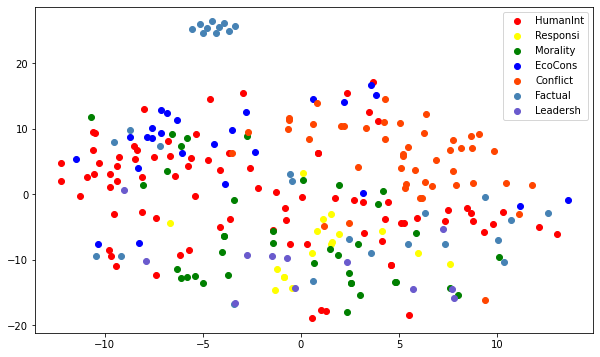

In [213]:
#词向量

data = np.array(all_embeddings)
print(type(data))
print(data.shape)

# 标签      
target = np.array(label)
print(target)
print(target.shape)
target_names =np.array(['HumanInt', 'Responsi', 'Morality', 'EcoCons', 'Conflict', 'Factual', 'Leadersh'])

# 将词向量转化为2维向量
fea = TSNE(n_components=2,random_state=33).fit_transform(data)
#fea = PCA(n_components=2).fit_transform(all_embeddings)
#print(fea)

# 画散点图
plt.figure(figsize=(10, 6))
colors = 'red','yellow','green','blue','orangered','steelblue','slateblue'
target_id = range(len(target_names))
#print(target_id)
for id, c, label in zip(target_ids, colors, target_names):
    plt.scatter(fea[target==categories[id], 0], fea[target==categories[id], 1], c = c, label = label)

plt.legend()
plt.show()
